# REPORTE DE MÉTRICAS Y CONCLUSIONES

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import files
import random
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
from sklearn.manifold import TSNE

from keras.models import load_model

from gensim.models import Word2Vec

In [2]:
# Conecto al drive y guardo el archivo
drive.mount('/content/drive')

# Cargo el dataframe procesado
music_df_process = pd.read_csv('/content/drive/MyDrive/music_df_process.csv')

Mounted at /content/drive


CARGAMOS LOS DATOS DE MACHINE LEARNING

In [3]:
# Cargamos el modelo desde el archivo
with open('/content/drive/My Drive/lr_model.pkl', 'rb') as f:
    lr_model = pickle.load(f)

# Cargamos los conjuntos de entrenamiento y prueba
with open('/content/drive/My Drive/X_train_ml.pkl', 'rb') as f:
    X_train_ml = pickle.load(f)

with open('/content/drive/My Drive/X_test_ml.pkl', 'rb') as f:
    X_test_ml = pickle.load(f)

# Cargamos las listas train_acc y test_acc
with open('/content/drive/My Drive/train_acc.pkl', 'rb') as f:
    train_acc = pickle.load(f)

with open('/content/drive/My Drive/test_acc.pkl', 'rb') as f:
    test_acc = pickle.load(f)

# Cargamos el vectorizador desde el archivo
with open('/content/drive/My Drive/tfidf_vectorizer.pkl', 'rb') as f:
    cv = pickle.load(f)

FUNCIONES

In [4]:
# Funcion de prediccion de ML

def predict_review_sentiment(review_index, model):
    print('Actual sentiment: {}'.format(music_df_process.iloc[review_index]['sentiment']))
    r = music_df_process.iloc[review_index]['review_norm']
    print('Prediction: {}'.format(lr_model.predict(cv.transform([r]))))

METRICAS DE LA REGRESION LOGISTICA


In [5]:
# Separamos los datos con entrenamiento 75% y test 25%

X_train, X_test, y_train, y_test = train_test_split(
    music_df_process['review_norm'],
    music_df_process['sentiment'],
    train_size=0.75,
    test_size=0.25,
    random_state=42,
    shuffle=True)

In [6]:
# Prededimos del modelo

test_predict = lr_model.predict(X_test_ml)

In [7]:
# Métricas

print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[10426  1995]
 [ 1833 10701]]

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     12421
           1       0.84      0.85      0.85     12534

    accuracy                           0.85     24955
   macro avg       0.85      0.85      0.85     24955
weighted avg       0.85      0.85      0.85     24955

Accuracy score:0.8466038869965938


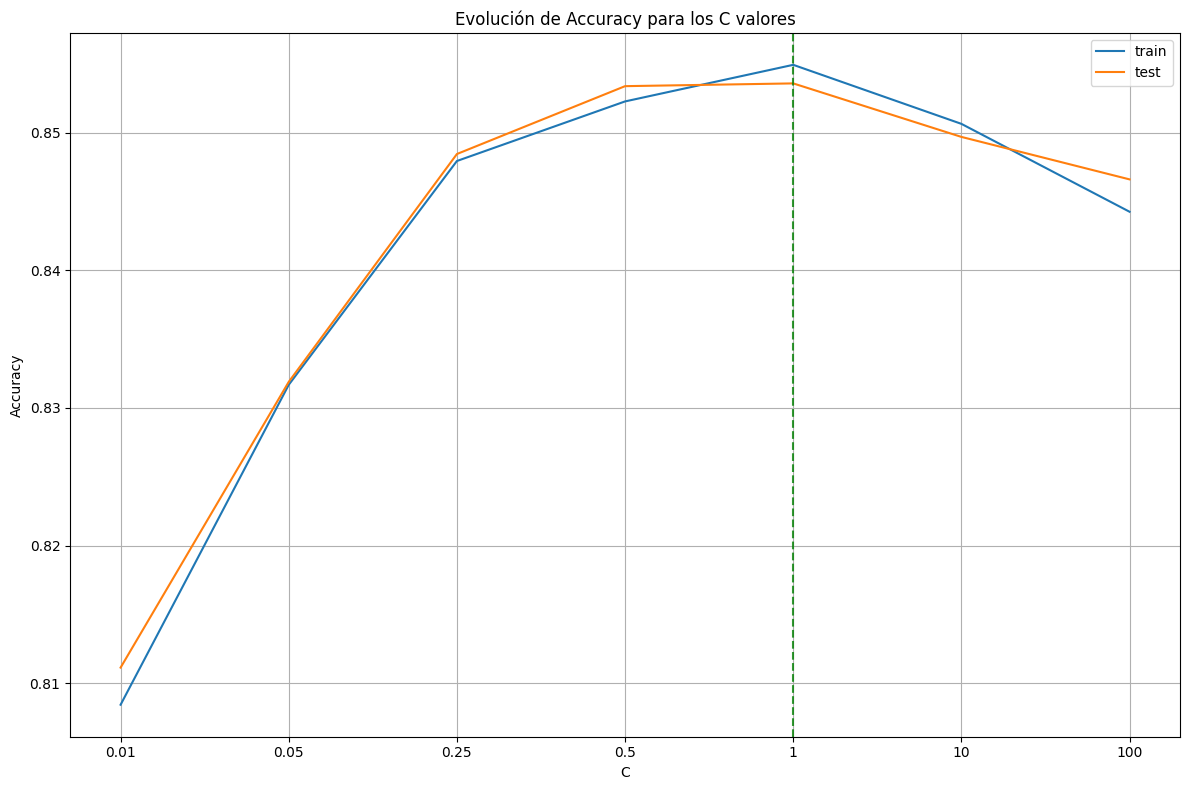

In [8]:
# Graficamos el accuracy

c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100]

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Evolución de Accuracy para los C valores')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

Predict

In [9]:
# Aplicamos la funcion de predicción y mostramos resultados aleatorios

for i in random.sample(range(0, len(music_df_process)), 8):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, lr_model)


Review no. 80654
Actual sentiment: 0
Prediction: [1]

Review no. 60897
Actual sentiment: 0
Prediction: [0]

Review no. 64194
Actual sentiment: 0
Prediction: [0]

Review no. 40083
Actual sentiment: 1
Prediction: [1]

Review no. 8867
Actual sentiment: 1
Prediction: [1]

Review no. 53652
Actual sentiment: 0
Prediction: [0]

Review no. 68326
Actual sentiment: 0
Prediction: [0]

Review no. 20664
Actual sentiment: 1
Prediction: [1]


CARGAMOS LOS DATOS DE DEEP LEARNING

In [10]:
# Cargamos el modelo Word2Vec
word2vec_model = Word2Vec.load('/content/drive/MyDrive/word2vec_model.h5')

# Cargamos el modelo desde el archivo
model_custom = load_model('/content/drive/MyDrive/rnn_w2v_model.h5')

# Cargamos los conjuntos de entrenamiento, validación y prueba
with open('/content/drive/MyDrive/X_train_pad.pkl', 'rb') as f:
    X_train_pad = pickle.load(f)

with open('/content/drive/MyDrive/X_val_pad.pkl', 'rb') as f:
    X_val_pad = pickle.load(f)

with open('/content/drive/MyDrive/X_test_pad.pkl', 'rb') as f:
    X_test_pad = pickle.load(f)

VISUALIZACIÓN DE EMBEDDING CON WORD2VEC

In [11]:
word2vec_model.wv.most_similar('bass')

[('treble', 0.650443434715271),
 ('punchier', 0.606884241104126),
 ('boomy', 0.5878309011459351),
 ('mids', 0.5852643847465515),
 ('midrange', 0.5438030362129211),
 ('boosted', 0.5434052348136902),
 ('thump', 0.5419644713401794),
 ('mid', 0.5252914428710938),
 ('punchy', 0.5209819078445435),
 ('deep', 0.5205215215682983)]

Creamos _clusters_ de palabras con las más similares a unas dadas

In [12]:
keys = ['guitar','bass','microphone']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in word2vec_model.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(word2vec_model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [13]:
print(word_clusters)

[['acoustic', 'electric', 'rogue', 'mandolin', 'banjo', 'strat', 'epiphone', 'taylor', 'neck', 'rad'], ['treble', 'punchier', 'boomy', 'mids', 'midrange', 'boosted', 'thump', 'mid', 'punchy', 'deep'], ['mike', 'mic', 'mics', 'camcorder', 'lavalier', 'mxl', 'condenser', 'interview', 'rode', 'filming']]


Reducimos dimensionalidad a 2D para poder representar

In [14]:
tsne_model_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)

In [15]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

In [16]:
embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

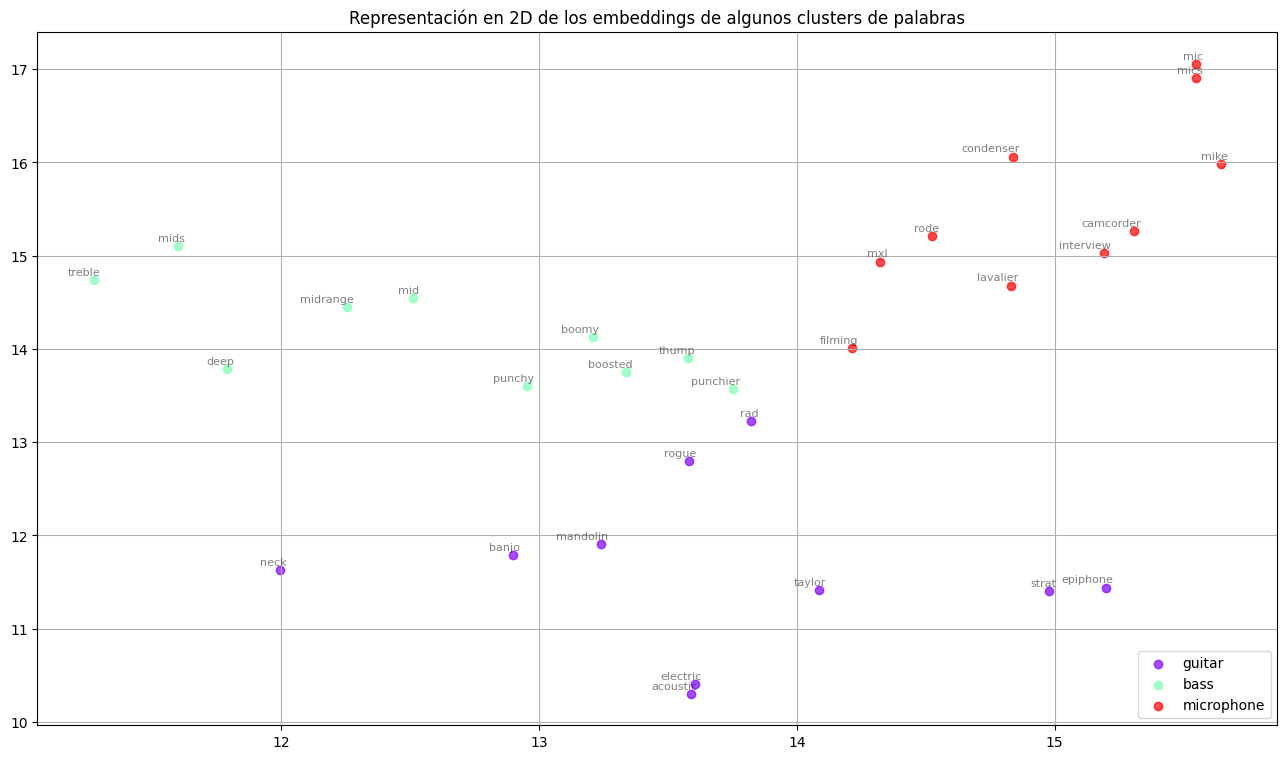

In [17]:
# Graficamos los embeddings

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representación en 2D de los embeddings de algunos clusters de palabras')
    # plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

COMENZAMOS EL ENTRENAMIENTO Y TESTEO DEL MODELO RNN

In [18]:
# Dividir los datos en entrenamiento (75%) y prueba (25%)
X_train, X_test, y_train, y_test = train_test_split(
    music_df_process['review_norm'],
    music_df_process['sentiment'],
    train_size=0.75,
    test_size=0.25,
    random_state=42,
    shuffle=True)

# Dividir el conjunto de entrenamiento nuevamente en entrenamiento (85%) y validación (15%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    train_size=0.85,
    test_size=0.15,
    random_state=42,
    shuffle=True)

# Imprimir las formas de los conjuntos resultantes
print("Entrenamiento:", X_train.shape, y_train.shape)
print("Validación:", X_val.shape, y_val.shape)
print("Prueba:", X_test.shape, y_test.shape)

Entrenamiento: (63635,) (63635,)
Validación: (11230,) (11230,)
Prueba: (24955,) (24955,)


In [19]:
batch_size = 512
num_epochs = 20

history = model_custom.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=num_epochs, batch_size=batch_size)

Epoch 1/20
125/125 [==============================] - 137s 1s/step - loss: 0.1738 - accuracy: 0.9310 - val_loss: 0.3921 - val_accuracy: 0.8538
Epoch 2/20
125/125 [==============================] - 148s 1s/step - loss: 0.1731 - accuracy: 0.9308 - val_loss: 0.3923 - val_accuracy: 0.8570
Epoch 3/20
125/125 [==============================] - 129s 1s/step - loss: 0.1662 - accuracy: 0.9331 - val_loss: 0.3992 - val_accuracy: 0.8545
Epoch 4/20
125/125 [==============================] - 125s 1s/step - loss: 0.1616 - accuracy: 0.9357 - val_loss: 0.4143 - val_accuracy: 0.8569
Epoch 5/20
125/125 [==============================] - 123s 986ms/step - loss: 0.1565 - accuracy: 0.9377 - val_loss: 0.4147 - val_accuracy: 0.8551
Epoch 6/20
125/125 [==============================] - 124s 992ms/step - loss: 0.1542 - accuracy: 0.9395 - val_loss: 0.4231 - val_accuracy: 0.8546
Epoch 7/20
125/125 [==============================] - 124s 984ms/step - loss: 0.1506 - accuracy: 0.9397 - val_loss: 0.4216 - val_accurac

METRICAS DE LA RNN + EMBEDDING DE DEEP LEARNING

In [20]:
# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model_custom.evaluate(X_test_pad, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

780/780 [==============================] - 78s 99ms/step - loss: 0.5285 - accuracy: 0.8482
Test Loss: 0.5285246968269348
Test Accuracy: 0.8482067584991455


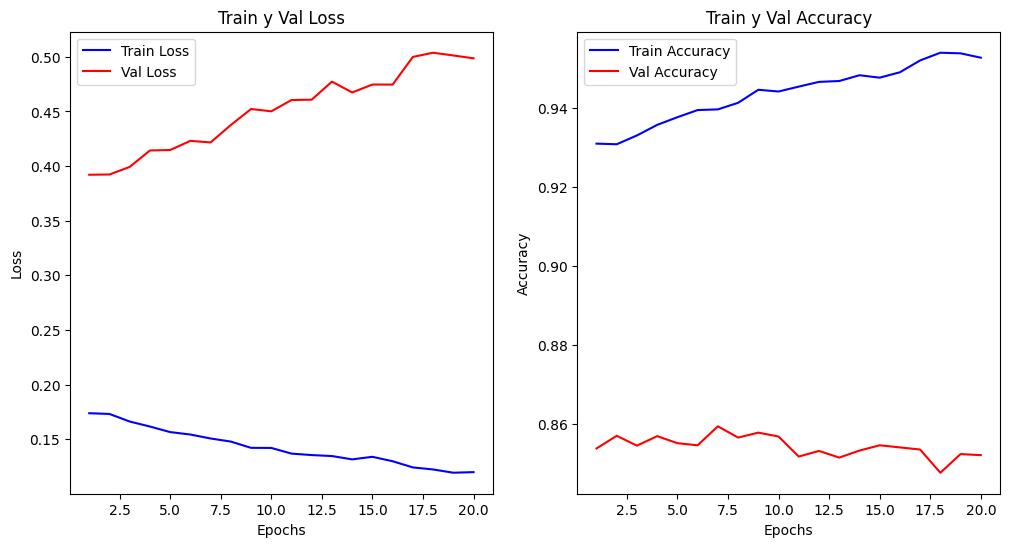

In [21]:
# Obtener las métricas de pérdida y precisión del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Graficar la pérdida durante el entrenamiento y la validación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Val Loss')
plt.title('Train y Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graficar la precisión durante el entrenamiento y la validación
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Val Accuracy')
plt.title('Train y Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

780/780 [==============================] - 91s 117ms/step
Confusion Matrix:
[[10549  1872]
 [ 1916 10618]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     12421
           1       0.85      0.85      0.85     12534

    accuracy                           0.85     24955
   macro avg       0.85      0.85      0.85     24955
weighted avg       0.85      0.85      0.85     24955



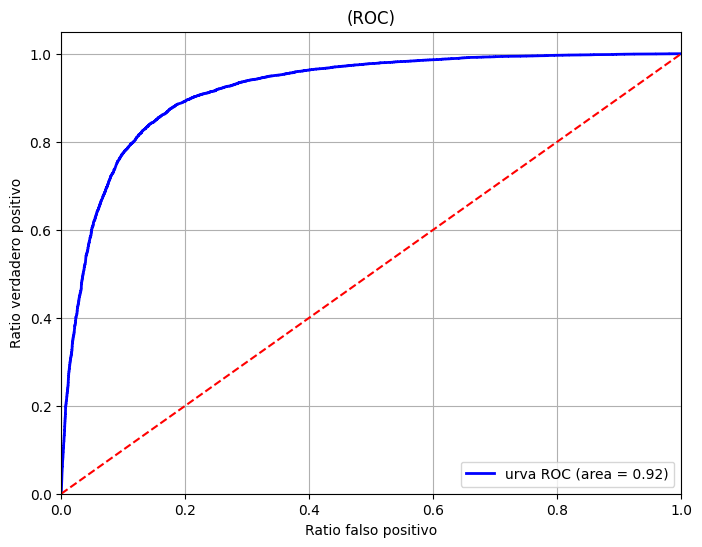

In [22]:
# Predicciones del modelo en el conjunto de prueba
y_pred = model_custom.predict(X_test_pad)
y_pred_binary = (y_pred > 0.5).astype(int)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio falso positivo')
plt.ylabel('Ratio verdadero positivo')
plt.title('(ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Conclusion: El modelo alcanzó una precisión de alrededor del 93% en el conjunto de train, pero solo alrededor del 85% en el conjunto de validación después de 20 épocas de entrenamiento. El modelo podría estar sobreajustando los datos de entrenamiento, lo que significa que está aprendiendo demasiado específicamente a partir de esos datos y no generalizando bien a datos nuevos.

El modelo parece estar aprendiendo bastante bien los datos de train, ya que la pérdida en el conjunto de entrenamiento disminuye con cada época y el accuracy aumenta. Sin embargo, en el conjunto de validación, la pérdida y la precisión no mejoran significativamente después de las primeras épocas, lo que sugiere que el modelo no está generalizando bien a datos nuevos. Es importante notar que la pérdida en el conjunto de validación es mayor que en el conjunto de entrenamiento, lo que indica cierto grado de sobreajuste.

En resumen, el modelo parece estar en overfitting y no generaliza bien a nuevos datos. Se necesita realizar un mejor preprocesado de los datos (como se observa en el gráfico de embeddings), es posible que se necesite ajustar la arquitectura del modelo (he probado otras arquitecturas y han dado peor resultado), agregar regularización o aumentar los datos de entrenamiento para mejorar el rendimiento en datos no vistos (considerando la magnitud del dataframe original si que se podria aumentar los datos de tran, val y test) y por motivos de Colab es que no he podido aumentar la magnitud de los datos. Además, se podría considerar ajustes de hiperparámetros para optimizar la capacidad de generalización del modelo.

